In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas, plot_stat_map
from nilearn.image import iter_img

Merging volumes corresponding to events where subjective loss was the largest

[MultiNiftiMasker.fit] Loading data from [../merged_fslmerge_run1_slices_9_10_11_onset_18.nii.gz].
[{self.__class__.__name__}.fit] Computing mask


Template whole-brain mask computation
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('../merged_fslmerge_run1_slices_9_10_11_onset_18.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 2.231426e-03, ...,  3.760614e-05],
       ...,
       [-2.146737e-03, ..., -3.022373e-05]], dtype=float32), n_components=10, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.1686

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.6s


__________________________________________________________fastica - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.168677, ...,  0.689752],
       ...,
       [ 0.000721, ...,  0.001529]]), whiten='arbitrary-variance', fun='cube', random_state=924231285)
__________________________________________________________fastica - 0.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.168677, ...,  0.689752],
       ...,
       [ 0.000721, ...,  0.001529]]), whiten='arbitrary-variance', fun='cube', random_state=1478610112)
__________________________________________________________fastica - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0

[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    3.3s


__________________________________________________________fastica - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.168677, ...,  0.689752],
       ...,
       [ 0.000721, ...,  0.001529]]), whiten='arbitrary-variance', fun='cube', random_state=1537364731)
__________________________________________________________fastica - 0.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.168677, ...,  0.689752],
       ...,
       [ 0.000721, ...,  0.001529]]), whiten='arbitrary-variance', fun='cube', random_state=192771779)
__________________________________________________________fastica - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0

[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    6.1s


__________________________________________________________fastica - 0.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.168677, ...,  0.689752],
       ...,
       [ 0.000721, ...,  0.001529]]), whiten='arbitrary-variance', fun='cube', random_state=1819583497)
__________________________________________________________fastica - 0.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.168677, ...,  0.689752],
       ...,
       [ 0.000721, ...,  0.001529]]), whiten='arbitrary-variance', fun='cube', random_state=530702035)
__________________________________________________________fastica - 0.5s, 0.0min


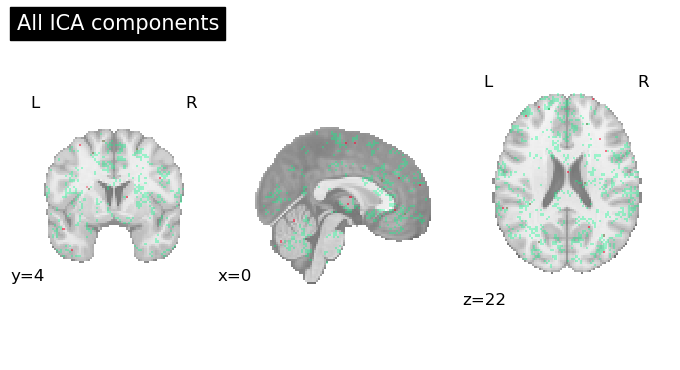

In [5]:
func_filenames = [
    '../merged_fslmerge_run1_slices_9_10_11_onset_18.nii.gz'
]
canica = CanICA(
    n_components=10,
    memory='nilearn_cache',
    memory_level=2,
    verbose=10,
    mask_strategy='whole-brain-template',
    random_state=0,
    standardize='zscore_sample',
)
canica.fit(func_filenames)
plot_prob_atlas(canica.components_img_, title='All ICA components', draw_cross=False)
plt.show()

In [6]:
print('Total explained variance:', canica.score(canica.components_img_))

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 3),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._explained_variance...
_explained_variance(array([[1.470209e+00, ..., 1.414334e+00],
       ...,
       [1.768077e-09, ..., 3.943561e-08]], dtype=float32), 
array([[0.      , ..., 0.      ],
       ...,
       [0.999998, ..., 0.      ]], dtype=float32), per_component=False)
_______________________________________________explained_variance - 0.1s, 0.0min
Total explained variance: 0.6224911735134386


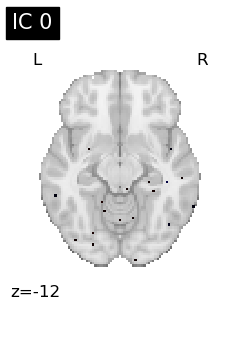

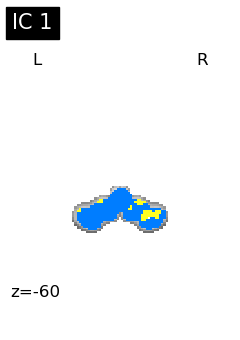

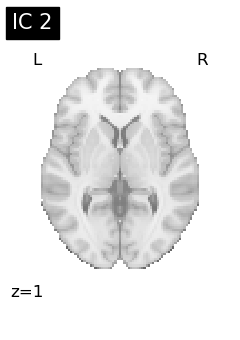

In [7]:
for i, cur_img in enumerate(iter_img(canica.components_img_)):
    plot_stat_map(cur_img, display_mode='z', title=f'IC {int(i)}', cut_coords=1, colorbar=False)